<a href="https://colab.research.google.com/github/BrilliantChard/Computer-Vision/blob/main/Convolution_and_ReLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [7]:
image_path = '/content/drive/MyDrive/Colab Notebooks/car_illus.jpg'

In [19]:
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=3)  # Channel=3 means the image is of color Red, Green, Blue
image = tf.image.resize(image, size=[400, 400])

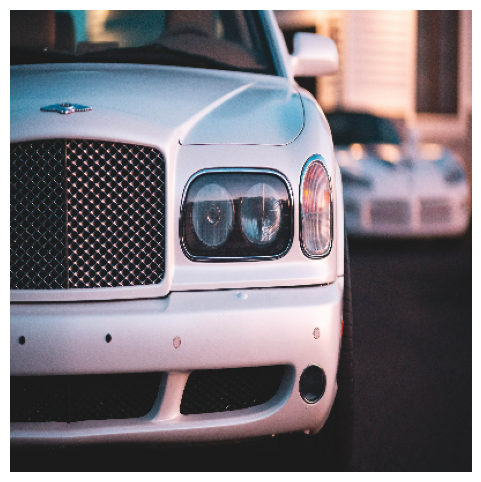

In [20]:
img = tf.squeeze(image).numpy()
plt.figure(figsize=(6, 6))
plt.imshow(img.astype('uint8')) # Tells Matplotlib this is a colored imaged as opposed to cmap='gray' for channel =1
plt.axis('off')
plt.show();

In [31]:
kernel = tf.constant([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2],
], dtype=tf.float32)

In [32]:
kernel.shape

TensorShape([3, 3])

In [29]:
# Reformat for batch compatibility.

image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

In [30]:
conv_fn = tf.nn.conv2d

In [26]:
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show();

InvalidArgumentError: {{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:CPU:0}} output depth must be evenly divisible by number of groups: 1 vs 3 [Op:Conv2D] name: 

In [14]:
relu_fn = tf.nn.relu

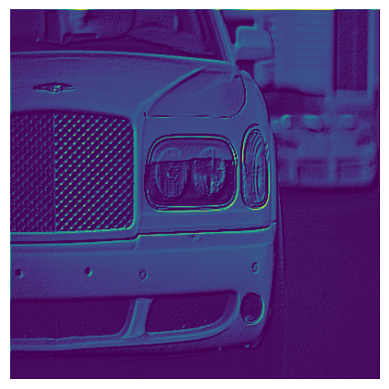

In [15]:
image_detect = relu_fn(image_filter)

plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)
plt.axis('off')
plt.show();